## Meteorology analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

#### Analyzed data will be used to predict the Sud region's consumption

Licence : [Apache License 2.0]

Data provided by [OpenDataSoft] and [Météo France]

Source file link (csv) : https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&refine.nom_reg=Provence-Alpes-C%C3%B4te+d%27Azur&timezone=Europe/Berlin&use_labels_for_header=true&csv_separator=%3B

[OpenDataSoft]: https://public.opendatasoft.com/
[Météo France]: https://donneespubliques.meteofrance.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [1]:
# TODO: add inhabitants number to datasets
#%run MyOtherNotebook.ipynb
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt

In [2]:
# TODO: read https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/api/
# downloading data for the SUD region
data_link = "../datasets/meteorologie/donnees-synop-essentielles-omm-paca.csv"
# data_link = "https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&refine.nom_reg=Provence-Alpes-C%C3%B4te+d%27Azur&timezone=Europe/Berlin&use_labels_for_header=true&csv_separator=%3B"
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)
print(data.shape)
data.head()

(115137, 81)


,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Longitude,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code)
0,7591,2019-05-26T08:00:00+02:00,NaN,40.0,3.0,30.0,0.8,282.85,282.55,98.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
1,7661,2019-05-26T17:00:00+02:00,101230.0,-90.0,7.0,300.0,3.2,297.15,285.45,48.0,...,5.940833,43.079333,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93
2,7661,2019-05-30T17:00:00+02:00,102230.0,30.0,1.0,240.0,3.6,294.35,281.25,43.0,...,5.940833,43.079333,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93
3,7650,2019-06-02T17:00:00+02:00,101890.0,-80.0,7.0,200.0,5.0,298.75,284.55,41.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
4,7661,2019-06-03T11:00:00+02:00,101870.0,60.0,1.0,230.0,3.0,294.75,286.35,59.0,...,5.940833,43.079333,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93


In [3]:
# removing useless columns
# TODO: add EPCI (or department) when inhabitants number will be added
# removing columns with too much NaN values
acceptablePercentage = 40

def removeNaN(threshold, data):
    numRows, numColumns = data.shape
    nan_stats = data.isna().sum()
    for col_name, value in nan_stats.items():
        # if more than the acceptable percentage of the values are NaN
        if value*100/numRows >= acceptablePercentage:
            data = data.drop(columns=[col_name])
    return data

data = removeNaN(acceptablePercentage, data)
data

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Longitude,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code)
0,7591,2019-05-26T08:00:00+02:00,NaN,40.0,3.0,30.0,0.8,282.85,282.55,98.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
1,7661,2019-05-26T17:00:00+02:00,101230.0,-90.0,7.0,300.0,3.2,297.15,285.45,48.0,...,5.940833,43.079333,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93
2,7661,2019-05-30T17:00:00+02:00,102230.0,30.0,1.0,240.0,3.6,294.35,281.25,43.0,...,5.940833,43.079333,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93
3,7650,2019-06-02T17:00:00+02:00,101890.0,-80.0,7.0,200.0,5.0,298.75,284.55,41.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
4,7661,2019-06-03T11:00:00+02:00,101870.0,60.0,1.0,230.0,3.0,294.75,286.35,59.0,...,5.940833,43.079333,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115132,7661,2018-12-01T01:00:00+01:00,101560.0,80.0,1.0,320.0,1.6,282.65,281.05,90.0,...,5.940833,43.079333,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93
115133,7650,2018-12-01T07:00:00+01:00,101780.0,90.0,1.0,320.0,4.3,281.25,279.25,87.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
115134,7650,2019-01-10T07:00:00+01:00,101290.0,60.0,3.0,340.0,7.7,276.85,271.45,68.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
115135,7591,2019-01-10T13:00:00+01:00,NaN,-70.0,8.0,190.0,1.6,275.75,259.85,30.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93


In [4]:
# removing cities' and other useless caracteristics
# TODO: define criterias for remove selection
toRemove = [
    'Coordonnees', 'Nom', 'Longitude', 'Latitude', 'communes (name)', 
    'communes (code)', 'EPCI (name)', 'EPCI (code)', 'department (name)', 
    'department (code)', 'region (name)', 'region (code)',
    'Temps passé 1.1', 'Temps présent.1', 'Altitude', 
    'ID OMM station', 'Visibilité horizontale',
    'Température'
]
# we delete the Temperature column because we want the values in Celcius (not in Kelvin) 
# corresponding of the Température (°C) column
data = data.drop(columns=toRemove, errors='ignore') # ignore errors due to previous deletions
data

,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
0,2019-05-26T08:00:00+02:00,NaN,40.0,3.0,30.0,0.8,282.55,98.0,0.0,91440.0,2.1,-10.0,0.0,0.0,0.0,0.2,3.0,9.7
1,2019-05-26T17:00:00+02:00,101230.0,-90.0,7.0,300.0,3.2,285.45,48.0,NaN,99650.0,8.1,-10.0,0.0,0.0,0.6,0.6,7.0,24.0
2,2019-05-30T17:00:00+02:00,102230.0,30.0,1.0,240.0,3.6,281.25,43.0,NaN,100620.0,6.0,-10.0,0.0,0.0,0.0,0.0,1.0,21.2
3,2019-06-02T17:00:00+02:00,101890.0,-80.0,7.0,200.0,5.0,284.55,41.0,0.0,101520.0,8.1,-10.0,0.0,0.0,0.0,0.0,7.0,25.6
4,2019-06-03T11:00:00+02:00,101870.0,60.0,1.0,230.0,3.0,286.35,59.0,NaN,100270.0,4.8,-10.0,0.0,0.0,0.0,0.0,1.0,21.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115132,2018-12-01T01:00:00+01:00,101560.0,80.0,1.0,320.0,1.6,281.05,90.0,NaN,100070.0,4.9,-10.0,-0.1,0.6,2.4,23.2,1.0,9.5
115133,2018-12-01T07:00:00+01:00,101780.0,90.0,1.0,320.0,4.3,279.25,87.0,0.0,101390.0,5.8,-10.0,0.0,0.0,0.0,-0.1,1.0,8.1
115134,2019-01-10T07:00:00+01:00,101290.0,60.0,3.0,340.0,7.7,271.45,68.0,0.0,100890.0,13.1,-10.0,0.0,0.0,0.0,0.0,3.0,3.7
115135,2019-01-10T13:00:00+01:00,NaN,-70.0,8.0,190.0,1.6,259.85,30.0,0.0,91250.0,3.7,-10.0,0.0,0.0,0.0,0.0,8.0,2.6


In [5]:
# sort data by date (increasing order)
data = data.sort_values(by='Date')
data.dtypes

Date                                            object
Pression au niveau mer                         float64
Variation de pression en 3 heures              float64
Type de tendance barométrique                  float64
Direction du vent moyen 10 mn                  float64
Vitesse du vent moyen 10 mn                    float64
Point de rosée                                 float64
Humidité                                       float64
Temps présent                                  float64
Pression station                               float64
Rafales sur une période                        float64
Periode de mesure de la rafale                 float64
Précipitations dans la dernière heure          float64
Précipitations dans les 3 dernières heures     float64
Précipitations dans les 6 dernières heures     float64
Précipitations dans les 12 dernières heures    float64
Type de tendance barométrique.1                float64
Température (°C)                               float64
dtype: obj

In [6]:
# group rows by Date and applying the mean operation
data = data.groupby(['Date'], as_index=False).agg(np.mean)
#data = data.groupby(['Date']).agg(np.mean)
#data = data.loc['2019-12-01':]
print(data.shape)
data

(28979, 18)


,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
0,2010-01-01T01:00:00+01:00,99103.333333,-147.5,7.750000,192.5,2.800,280.875,89.00,6.000000,96062.5,6.550,-10.0,0.20,0.20,0.250000,NaN,7.750000,9.475
1,2010-01-01T04:00:00+01:00,98823.333333,-282.5,7.000000,222.5,5.675,280.200,87.75,31.666667,95780.0,8.325,-10.0,0.20,0.25,NaN,NaN,7.000000,8.950
2,2010-01-01T07:00:00+01:00,98866.666667,-90.0,6.333333,165.0,7.825,278.525,85.75,21.000000,95772.5,11.300,-10.0,0.00,0.80,NaN,1.333333,6.333333,7.625
3,2010-01-01T10:00:00+01:00,99106.666667,232.5,2.000000,177.5,5.550,278.550,86.25,45.000000,96005.0,9.900,-10.0,0.35,0.85,NaN,NaN,2.000000,7.600
4,2010-01-01T13:00:00+01:00,99226.666667,107.5,1.000000,257.5,8.350,278.750,82.00,35.250000,96112.5,12.475,-10.0,0.10,0.40,1.250000,NaN,1.000000,8.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28974,2020-01-29T10:00:00+01:00,101613.333333,140.0,1.250000,275.0,6.800,276.350,66.75,1.250000,98502.5,12.475,-10.0,0.00,0.00,-0.033333,0.266667,1.250000,9.300
28975,2020-01-29T13:00:00+01:00,101620.000000,-7.5,2.000000,240.0,5.700,276.500,55.75,0.333333,98495.0,9.725,-10.0,0.00,0.00,0.000000,0.266667,2.000000,12.625
28976,2020-01-29T16:00:00+01:00,101596.666667,-10.0,4.000000,227.5,7.000,278.175,63.50,0.666667,98485.0,10.400,-10.0,0.00,0.00,0.000000,-0.033333,4.000000,11.900
28977,2020-01-29T19:00:00+01:00,101756.666667,172.5,3.000000,160.0,4.625,277.900,74.50,0.500000,98657.5,7.300,-10.0,0.00,0.00,0.000000,0.000000,3.000000,9.125


In [7]:
# adding custom dates columns
# to match the consumption dataset
data.insert(loc=1, column='Date - Heure', value=pd.to_datetime(data['Date']))
data['Date'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True).dt.date
data.insert(loc=1, column='Heure', value=pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True).dt.time)
# print(data.loc['2019-12-01'])
data

,Date,Heure,Date - Heure,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
0,2010-01-01,00:00:00,2010-01-01 01:00:00+01:00,99103.333333,-147.5,7.750000,192.5,2.800,280.875,89.00,6.000000,96062.5,6.550,-10.0,0.20,0.20,0.250000,NaN,7.750000,9.475
1,2010-01-01,03:00:00,2010-01-01 04:00:00+01:00,98823.333333,-282.5,7.000000,222.5,5.675,280.200,87.75,31.666667,95780.0,8.325,-10.0,0.20,0.25,NaN,NaN,7.000000,8.950
2,2010-01-01,06:00:00,2010-01-01 07:00:00+01:00,98866.666667,-90.0,6.333333,165.0,7.825,278.525,85.75,21.000000,95772.5,11.300,-10.0,0.00,0.80,NaN,1.333333,6.333333,7.625
3,2010-01-01,09:00:00,2010-01-01 10:00:00+01:00,99106.666667,232.5,2.000000,177.5,5.550,278.550,86.25,45.000000,96005.0,9.900,-10.0,0.35,0.85,NaN,NaN,2.000000,7.600
4,2010-01-01,12:00:00,2010-01-01 13:00:00+01:00,99226.666667,107.5,1.000000,257.5,8.350,278.750,82.00,35.250000,96112.5,12.475,-10.0,0.10,0.40,1.250000,NaN,1.000000,8.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28974,2020-01-29,09:00:00,2020-01-29 10:00:00+01:00,101613.333333,140.0,1.250000,275.0,6.800,276.350,66.75,1.250000,98502.5,12.475,-10.0,0.00,0.00,-0.033333,0.266667,1.250000,9.300
28975,2020-01-29,12:00:00,2020-01-29 13:00:00+01:00,101620.000000,-7.5,2.000000,240.0,5.700,276.500,55.75,0.333333,98495.0,9.725,-10.0,0.00,0.00,0.000000,0.266667,2.000000,12.625
28976,2020-01-29,15:00:00,2020-01-29 16:00:00+01:00,101596.666667,-10.0,4.000000,227.5,7.000,278.175,63.50,0.666667,98485.0,10.400,-10.0,0.00,0.00,0.000000,-0.033333,4.000000,11.900
28977,2020-01-29,18:00:00,2020-01-29 19:00:00+01:00,101756.666667,172.5,3.000000,160.0,4.625,277.900,74.50,0.500000,98657.5,7.300,-10.0,0.00,0.00,0.000000,0.000000,3.000000,9.125


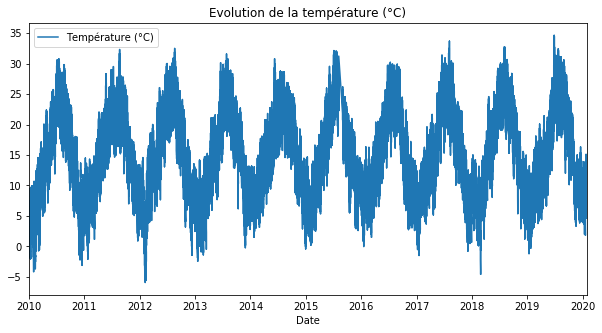

In [8]:
# representation part
data[['Date', 'Température (°C)']].plot(
    x='Date', label='Température', title="Evolution de la température (°C)", figsize=(10,5)
)

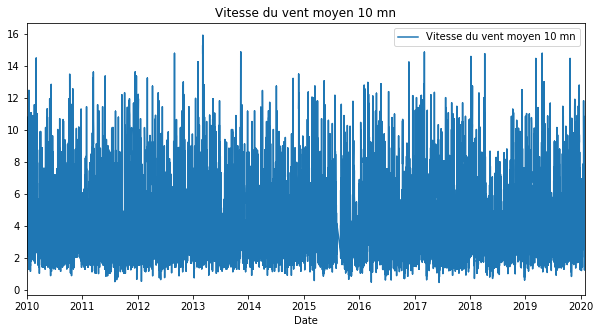

In [9]:
data[['Date', 'Vitesse du vent moyen 10 mn']].plot(
    x='Date', label='Vitesse moyenne', title='Vitesse du vent moyen 10 mn', figsize=(10,5)
)